In [53]:
import matplotlib.pyplot as plt
plt.close("all")

In [69]:
import pandas as pd 
"""
df=pd.read_csv('prb_congestion.csv' ,sep=";",decimal=",")



df


df = pd.read_csv('prb_congestion.csv', sep=';', decimal=',')
df.columns = df.columns.str.strip()

num_cols = ['charge_CCE','charge_PRB','Trafic','NBR_UE','CQI','débit']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df



df = pd.read_csv('prb_congestion.csv', sep=';', decimal=',')
df.columns = df.columns.str.strip()

num_cols = ['charge_CCE','charge_PRB','CQI','débit','NBR_UE','Trafic']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df['congested'] = pd.to_numeric(df['congested'], errors='coerce').astype('Int64')
df

"""

df = pd.read_csv(
    "prb_congestion.csv",
    sep=";",
    decimal=","
)

df.columns = df.columns.str.strip() 
df

,cellule,largeur de bande,charge_CCE,charge_PRB,CQI,débit,NBR_UE,Trafic,congested
0,1,10.0,13.628117,5.000000,10.960715,0.134373,0.877257,0.000028,0
1,2,10.0,67.187072,90.000000,7.732582,0.224501,7.479492,0.720455,0
2,3,10.0,78.526777,61.000000,7.693118,0.226521,16.639801,1.617532,0
3,4,10.0,3.518277,5.000000,9.264000,0.244049,0.996700,0.000006,0
4,5,10.0,57.793288,95.000000,8.590487,0.274156,7.886607,0.927139,0
...,...,...,...,...,...,...,...,...,...
21134,21135,15.0,4.294465,8.833333,11.736691,64.113335,0.959819,1.612829,0
21135,21136,15.0,3.236017,6.000000,12.443535,65.454185,0.951888,0.398135,0
21136,21137,15.0,4.011054,7.166667,13.618567,67.008598,0.971538,1.188270,0
21137,21138,15.0,10.980612,70.833333,12.308727,68.919945,1.150805,26.422246,0


In [71]:
df.dtypes



cellule               int64
largeur de bande    float64
charge_CCE          float64
charge_PRB          float64
CQI                 float64
débit               float64
NBR_UE              float64
Trafic              float64
congested             int64
dtype: object

In [7]:
print(df.columns.tolist())


['cellule', 'largeur de bande', 'charge_CCE', 'charge_PRB', 'CQI', 'débit', 'NBR_UE', 'Trafic', 'congested']


In [9]:
df.isnull().sum()
df[['charge_CCE','charge_PRB']].isna().sum()

charge_CCE    0
charge_PRB    0
dtype: int64

In [11]:
df['charge_CCE'].isna().sum()
df['charge_CCE'].head(10)

0    13.628117
1    67.187072
2    78.526777
3     3.518277
4    57.793288
5     4.931691
6     4.629116
7    29.917779
8    38.097921
9    61.421331
Name: charge_CCE, dtype: float64

In [13]:
df.corr()


,cellule,largeur de bande,charge_CCE,charge_PRB,CQI,débit,NBR_UE,Trafic,congested
cellule,1.000000,0.308025,-0.669967,-0.587594,0.616226,0.900087,-0.443465,-0.186395,-0.196188
largeur de bande,0.308025,1.000000,-0.010105,0.080874,0.247067,0.272914,0.102828,0.375010,0.072688
charge_CCE,-0.669967,-0.010105,1.000000,0.895220,-0.477152,-0.578673,0.637456,0.645906,0.328485
charge_PRB,-0.587594,0.080874,0.895220,1.000000,-0.444694,-0.497667,0.666333,0.777644,0.298117
CQI,0.616226,0.247067,-0.477152,-0.444694,1.000000,0.584250,-0.246484,-0.105072,-0.099007
débit,0.900087,0.272914,-0.578673,-0.497667,0.584250,1.000000,-0.359430,-0.138007,-0.152101
NBR_UE,-0.443465,0.102828,0.637456,0.666333,-0.246484,-0.359430,1.000000,0.579733,0.531050
Trafic,-0.186395,0.375010,0.645906,0.777644,-0.105072,-0.138007,0.579733,1.000000,0.288794
congested,-0.196188,0.072688,0.328485,0.298117,-0.099007,-0.152101,0.531050,0.288794,1.000000


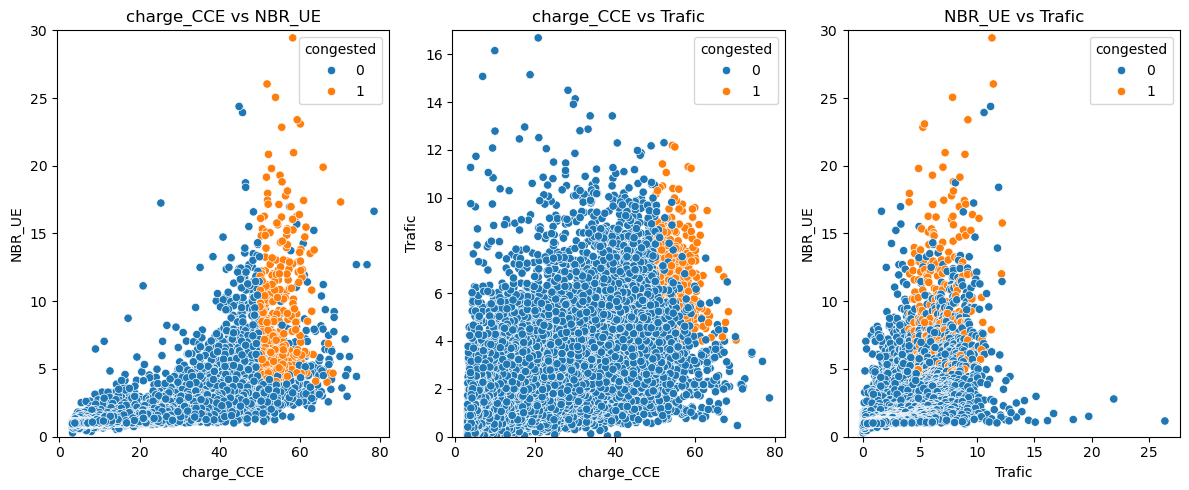

In [15]:
import seaborn as sns
df.columns = df.columns.str.strip()

fig, ax = plt.subplots(1,3,figsize=(12,5))

sns.scatterplot(data=df, x='charge_CCE', y='NBR_UE', hue='congested', ax=ax[0])
ax[0].set_ylim(0, 30)
ax[0].set_title("charge_CCE vs NBR_UE")
sns.scatterplot(data=df, x='charge_CCE', y='Trafic', hue='congested', ax=ax[1])
ax[1].set_ylim(0, 17)
ax[1].set_title("charge_CCE vs Trafic")
sns.scatterplot(data=df, x='Trafic', y='NBR_UE', hue='congested', ax=ax[2])
ax[2].set_ylim(0, 30)
ax[2].set_title("NBR_UE vs Trafic")

plt.tight_layout()
plt.show()


<Axes: xlabel='Trafic'>

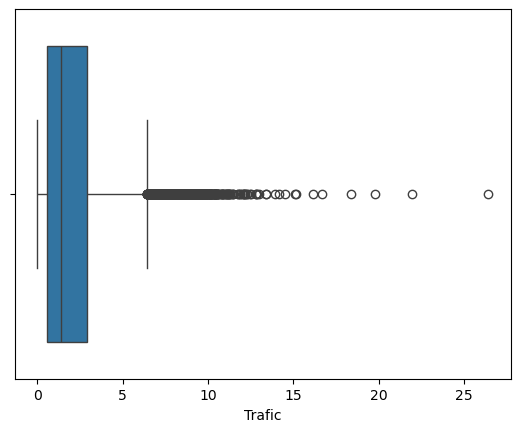

In [16]:
sns.boxplot(x=df['Trafic'])

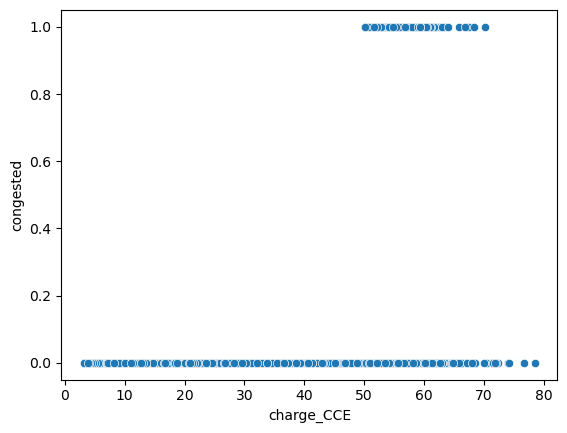

In [19]:
sns.scatterplot(x='charge_CCE', y='congested', data=df)
plt.show()

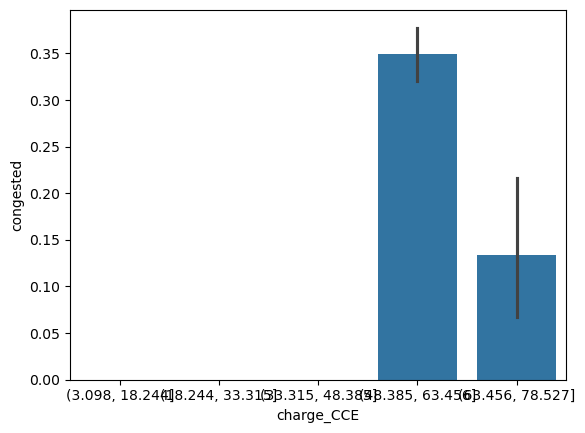

In [21]:
df['charge_CCE'] = pd.cut(df['charge_CCE'], bins=5)
sns.barplot(x='charge_CCE', y='congested', data=df)
plt.show()

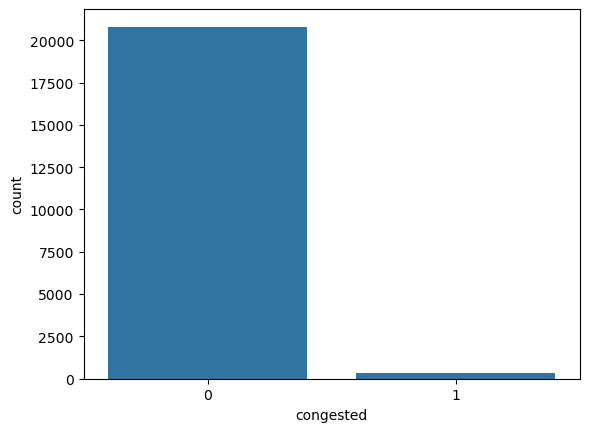

In [119]:
sns.countplot(x='congested', data=df)
plt.show()

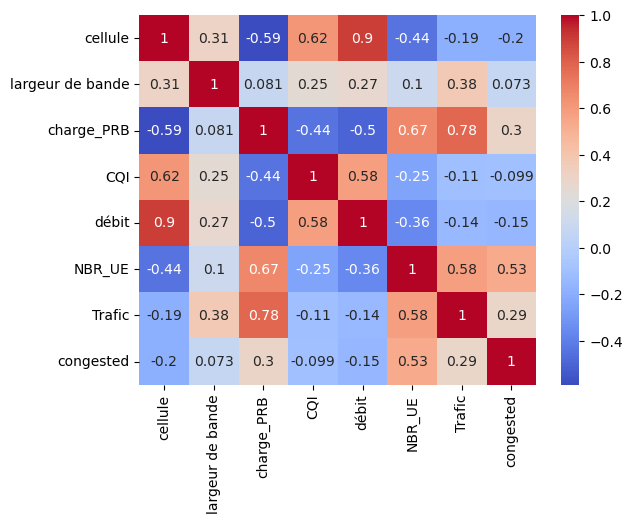

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
plt.close('all')
plt.figure(figsize=(10,6))

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()
"""

corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [23]:
print(df[['charge_CCE','charge_PRB']].dtypes)
print(type(df['charge_PRB'].iloc[0]), df['charge_PRB'].iloc[0])

charge_CCE    category
charge_PRB     float64
dtype: object
<class 'numpy.float64'> 5.0


In [25]:
print(df[['charge_CCE','charge_PRB']].dtypes)
print(type(df['charge_PRB'].iloc[0]), df['charge_PRB'].iloc[0])

charge_CCE    category
charge_PRB     float64
dtype: object
<class 'numpy.float64'> 5.0


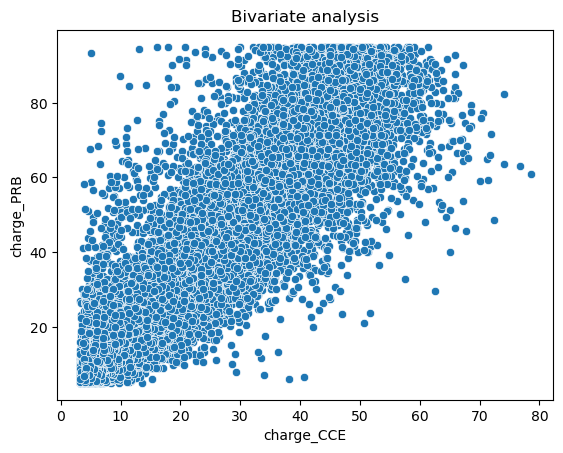

In [59]:


sns.scatterplot
sns.scatterplot(x=df['charge_CCE'], y=df['charge_PRB'])
plt.title('Bivariate analysis')
plt.show()

In [61]:
print(df.columns)

Index(['cellule', 'largeur de bande', 'charge_CCE', 'charge_PRB', 'CQI',
       'débit', 'NBR_UE', 'Trafic', 'congested'],
      dtype='object')


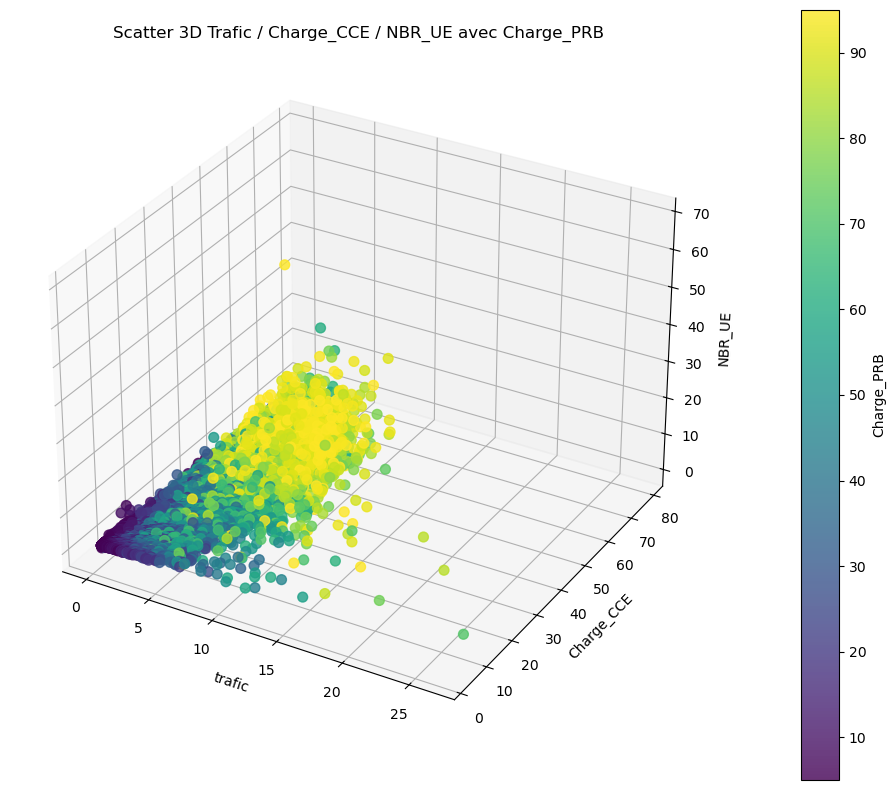

In [147]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D
sc = ax.scatter(
    df['Trafic'],        # X
    df['charge_CCE'],    # Y
    df['NBR_UE'],        # Z
    c=df['charge_PRB'],  # couleur selon Charge_PRB
    cmap='viridis',      # choix de la colormap
    s=50,                # taille des points
    alpha=0.8
)

# Ajout des labels
ax.set_xlabel("trafic")
ax.set_ylabel("Charge_CCE")
ax.set_zlabel("NBR_UE")
plt.title("Scatter 3D Trafic / Charge_CCE / NBR_UE avec Charge_PRB")

# Barre de couleur
cbar = plt.colorbar(sc, pad=0.1)
cbar.set_label('Charge_PRB')

plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df['Trafic'],       # X
    df['charge_CCE'],   # Y
    df['NBR_UE'],       # Z
    c=df['charge_PRB'], # couleur ou intensité
    cmap='viridis'
)
ax.set_xlabel("Trafic")
ax.set_ylabel("Charge_CCE")
ax.set_zlabel("NBR_UE")
plt.show()

C:\Users\Imad\AppData\Local\Temp\ipykernel_59664\113704184.py:11: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  plt.scatter(


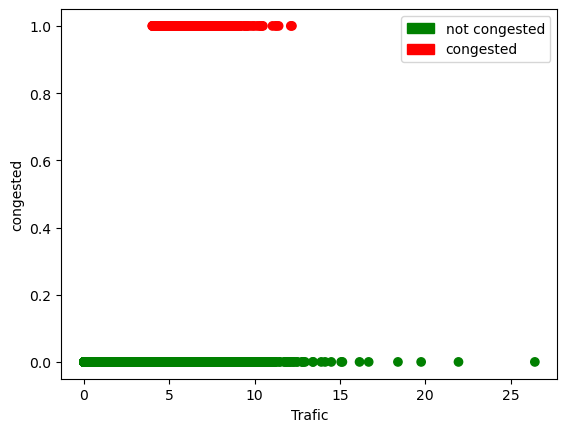

In [75]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = df['Trafic']          # attention à l'espace final
y = df['congested']       # attention à l'espace final

colors = y.map({0:'green', 1:'red'})

plt.scatter(
    x, y,
    c=colors,
    edgecolors=colors,
    facecolors='none'
)

plt.xlabel("Trafic")
plt.ylabel("congested")

red  = mpatches.Patch(color='green',  label='not congested')
blue = mpatches.Patch(color='red', label='congested')

plt.legend(handles=[red, blue], loc=1)
plt.show()

In [77]:
from sklearn import linear_model  
import numpy as np  
log_regress = linear_model.LogisticRegression()  
#---train the model--
log_regress.fit(X = np.array(x).reshape(len(x),1),
                y = y)
#---print trained model intercept--
print(log_regress.intercept_)     # [ 8.19393897]
#---print trained model coefficients--
print(log_regress.coef_)          # [[-0.54291739]

[-6.30127937]
[[0.5772434]]


In [79]:
print(log_regress.classes_)

[0 1]


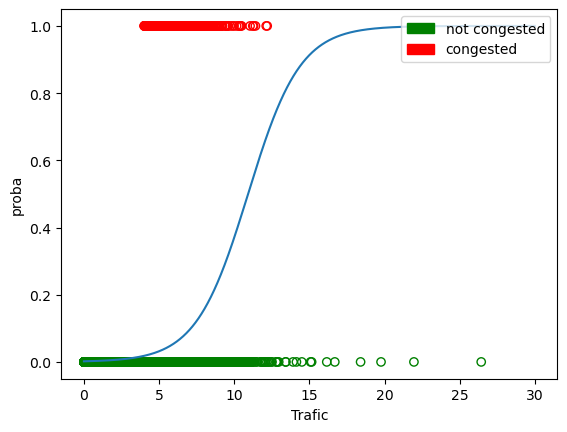

In [81]:
def sigmoid(x):  
    return (1 / (1 +  
        np.exp(-(log_regress.intercept_[0] +  
(log_regress.coef_[0][0] * x))))) 
x1 = np.arange(0, 30, 0.01) 
y1 = [sigmoid(n) for n in x1]  
plt.scatter(x,y,  
    
     edgecolors=colors, 
    facecolors='none')

plt.plot(x1,y1)  
plt.xlabel("Trafic")
plt.ylabel("proba")
plt.legend(handles=[red, blue], loc=1)

In [83]:
X_new = np.array([[15]])
print(log_regress.predict_proba(X_new)) 
print(log_regress.predict(X_new)[0])    

[[0.08648162 0.91351838]]
1


In [85]:
df.columns = df.columns.str.strip()


In [87]:
from sklearn.model_selection import train_test_split
x=pd.DataFrame(np.c_[df['charge_CCE'],df['Trafic'], df['NBR_UE']],columns=['charge_CCE','Trafic', 'NBR_UE'],)
Y=df['congested']
train_set, test_set, train_labels, test_labels  = train_test_split(x,Y,test_size=0.3,random_state=1)

In [89]:
from sklearn import linear_model  
x = train_set        # mean radius  
y = train_labels              # 0: malignant, 1: benign  
log_regress = linear_model.LogisticRegression()
log_regress.fit(X = x,y = y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [91]:
print(log_regress.intercept_)     #
print(log_regress.coef_) 

[-19.89150159]
[[0.26492829 0.55716112 0.22179323]]


In [93]:
import pandas as pd  
#---get the predicted probablities and convert into a dataframe--
preds_prob = pd.DataFrame(log_regress.predict_proba(X=test_set))
#---assign column names to prediction--
preds_prob.columns = ["not congested", "congested"]  
#---get the predicted class labels--
preds = log_regress.predict(X=test_set)
preds_class = pd.DataFrame(preds)  
preds_class.columns = ["Prediction"]
 #---actual diagnosis--
original_result = pd.DataFrame(test_labels)  
original_result.columns = ["Original Result"]  
#---merge the three dataframes into one---  
preds_prob = preds_prob.reset_index(drop=True)
preds_class = preds_class.reset_index(drop=True)
original_result = original_result.reset_index(drop=True)

result = pd.concat([preds_prob, preds_class, original_result], axis=1)  
print(result.head()) 

   not congested     congested  Prediction  Original Result
0       0.999999  1.437235e-06           0                0
1       1.000000  1.009496e-08           0                0
2       1.000000  4.117716e-07           0                0
3       0.999999  7.250138e-07           0                0
4       1.000000  7.114930e-08           0                0


In [95]:
#---generate table of predictions vs actual---  
print("---Confusion Matrix---")  
print(pd.crosstab(preds, test_labels))

---Confusion Matrix---
congested     0   1
row_0              
0          6202  52
1            31  57


In [97]:
from sklearn import metrics  
#---view the confusion matrix---  
print(metrics.confusion_matrix(y_true = test_labels,  # True labels
                               y_pred = preds))       # Predicted labels 

[[6202   31]
 [  52   57]]


In [99]:
"""
TN(6202) FN(52)
FP(31) TP(57)
"""

'\nTN(6202) FN(52)\nFP(31) TP(57)\n'

In [101]:
"""
Accuracy = (TN+TP)/(TN+FN+FP+TP)
Precision = TP/(FP+TP)
Recall = TP/(FN+TP)
"""

'\nAccuracy = (TN+TP)/(TN+FN+FP+TP)\nPrecision = TP/(FP+TP)\nRecall = TP/(FN+TP)\n'

In [103]:
#---get the accuracy of the prediction---  
print("---Accuracy---")
print(log_regress.score(X = test_set ,
                        y = test_labels))

---Accuracy---
0.9869126458530432


In [105]:
# View summary of common classification metrics   
print("---Metrices---")
print(metrics.classification_report(
        y_true = test_labels,  
        y_pred = preds))

---Metrices---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6233
           1       0.65      0.52      0.58       109

    accuracy                           0.99      6342
   macro avg       0.82      0.76      0.79      6342
weighted avg       0.99      0.99      0.99      6342



In [107]:
#      Receiver Operating Characteristic (ROC) Curve
from sklearn.metrics import roc_curve, auc  
#---find the predicted probabilities using the test set  
probs = log_regress.predict_proba(test_set)  
preds = probs[:,1] 
#---find the FPR, TPR, and threshold--
fpr, tpr, threshold = roc_curve(test_labels, preds)

In [109]:
print(fpr)
print(tpr)
print(threshold) 

[0.00000000e+00 1.60436387e-04 1.60436387e-04 3.20872774e-04
 3.20872774e-04 6.41745548e-04 6.41745548e-04 8.02181935e-04
 8.02181935e-04 9.62618322e-04 9.62618322e-04 1.12305471e-03
 1.12305471e-03 1.28349110e-03 1.28349110e-03 1.76480026e-03
 1.76480026e-03 1.92523664e-03 1.92523664e-03 2.08567303e-03
 2.08567303e-03 2.24610942e-03 2.24610942e-03 2.40654580e-03
 2.40654580e-03 2.56698219e-03 2.56698219e-03 2.72741858e-03
 2.72741858e-03 3.04829135e-03 3.04829135e-03 3.20872774e-03
 3.20872774e-03 3.36916413e-03 3.36916413e-03 4.01090967e-03
 4.01090967e-03 4.17134606e-03 4.17134606e-03 4.81309161e-03
 4.81309161e-03 4.97352800e-03 4.97352800e-03 5.29440077e-03
 5.29440077e-03 5.61527354e-03 5.61527354e-03 5.77570993e-03
 5.77570993e-03 6.41745548e-03 6.41745548e-03 6.89876464e-03
 6.89876464e-03 7.05920103e-03 7.05920103e-03 7.38007380e-03
 7.38007380e-03 7.54051019e-03 7.54051019e-03 8.18225574e-03
 8.18225574e-03 8.50312851e-03 8.50312851e-03 9.30531044e-03
 9.30531044e-03 9.465746

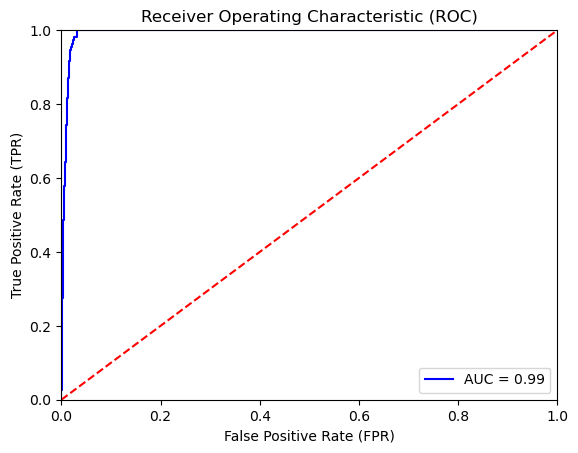

In [111]:
#  P l o t t i n g the ROC and Finding the Area Under the Curve (AUC)
#---find the area under the curve--
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt  
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1])  
plt.ylim([0, 1])  
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')  
plt.show()

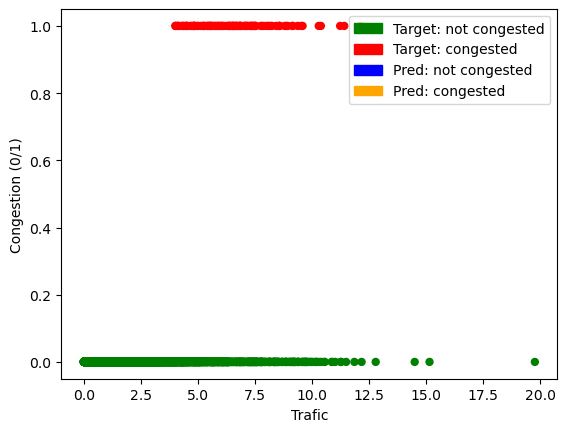

In [113]:
"""
X_features = ['charge_CCE','Trafic','NBR_UE']
#train_set, test_set, train_labels, test_labels  = train_test_split(x,Y,test_size=0.3,random_state=1)
# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)

# Plot target and predicted values
for i, feature in enumerate(X_features):
    ax[i].scatter(x_test[feature], test_labels , label='target', color='blue')
    ax[i].scatter(x_test[feature], preds, label='predict', color='orange')
    ax[i].set_xlabel(feature)

ax[0].set_ylabel("charge_PRB")
ax[0].legend()
fig.suptitle("Target vs Prediction (z-score normalized model)")
plt.show()


%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
train_set, test_set, train_labels, test_labels  = train_test_split(x,Y,test_size=0.3,random_state=1)
colors = y.map({0:'green', 1:'red'})

plt.scatter(
    x_test['Trafic'] , test_labels,
    c=colors,
    edgecolors=colors,
    facecolors='none', label='target'
)

plt.xlabel("Trafic")
plt.ylabel(preds)

plt.scatter(
    x_test['Trafic'] , test_labels,
    c=colors,
    edgecolors=colors,
    facecolors='none', label='predict'
)

red  = mpatches.Patch(color='green',  label='not congested')
blue = mpatches.Patch(color='red', label='congested')

plt.legend(handles=[red, blue], loc=1)




plt.show()

"""




%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# couleurs basées sur les vraies labels du test
colors_target = test_labels.map({0:'green', 1:'red'})
colors_pred   = pd.Series(preds).map({0:'blue', 1:'orange'})

plt.scatter(
    test_set['Trafic'],
    test_labels,
    c=colors_target,
    s=25,
    label='Target'
)

plt.scatter(
    test_set['Trafic'],
    preds,
    c=colors_pred,
    s=60,
    marker='X',
    label='Prediction'
)

plt.xlabel("Trafic")
plt.ylabel("Congestion (0/1)")

target_0 = mpatches.Patch(color='green', label='Target: not congested')
target_1 = mpatches.Patch(color='red',   label='Target: congested')
pred_0   = mpatches.Patch(color='blue',  label='Pred: not congested')
pred_1   = mpatches.Patch(color='orange',label='Pred: congested')

plt.legend(handles=[target_0, target_1, pred_0, pred_1], loc=1)



plt.show()


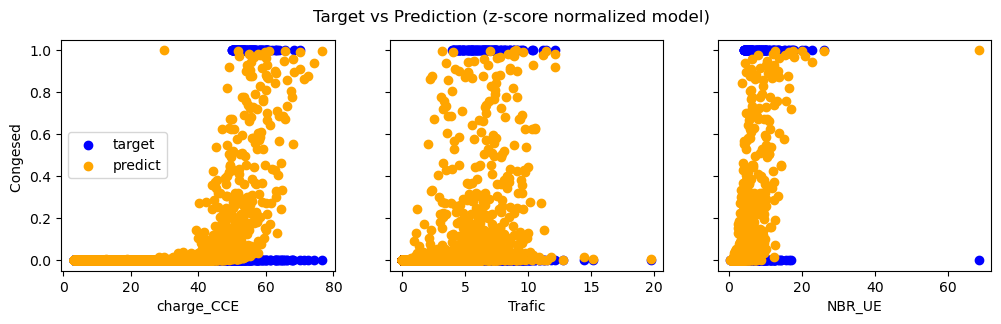

In [115]:
X_features = ['charge_CCE','Trafic','NBR_UE']

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)

# Plot target and predicted values
for i, feature in enumerate(X_features):
    ax[i].scatter(test_set[feature], test_labels, label='target', color='blue')
    ax[i].scatter(test_set[feature], preds, label='predict', color='orange')
    ax[i].set_xlabel(feature)

ax[0].set_ylabel("Congesed ")
ax[0].legend()
fig.suptitle("Target vs Prediction (z-score normalized model)")
plt.show()

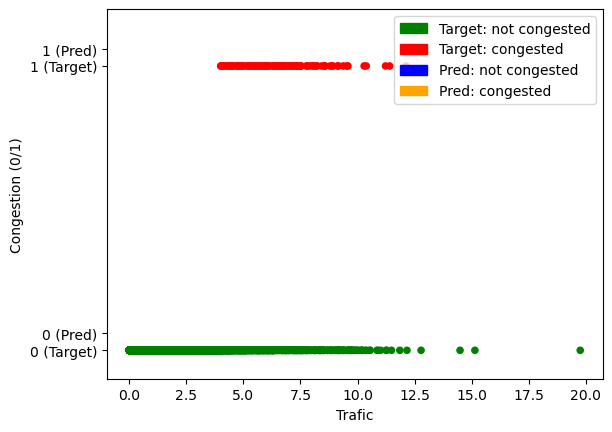

In [117]:
import numpy as np
import matplotlib.patches as mpatches

colors_target = test_labels.map({0:'green', 1:'red'})
colors_pred   = pd.Series(preds).map({0:'blue', 1:'orange'})

y_pred_plot = preds + 0.06   # petit décalage vertical

plt.scatter(test_set['Trafic'], test_labels, c=colors_target, s=20, label='Target')
plt.scatter(test_set['Trafic'], y_pred_plot, c=colors_pred, s=60, marker='x', label='Prediction')

plt.xlabel("Trafic")
plt.ylabel("Congestion (0/1)")

plt.yticks([0, 0.06, 1, 1.06], ['0 (Target)','0 (Pred)','1 (Target)','1 (Pred)'])
plt.ylim(-0.1, 1.2)

target_0 = mpatches.Patch(color='green',  label='Target: not congested')
target_1 = mpatches.Patch(color='red',    label='Target: congested')
pred_0   = mpatches.Patch(color='blue',   label='Pred: not congested')
pred_1   = mpatches.Patch(color='orange', label='Pred: congested')
plt.legend(handles=[target_0, target_1, pred_0, pred_1], loc=1)

plt.show()

In [136]:
# save the trained model to file 
import joblib
joblib.dump(log_regress,'Prb_congestion_model.pkl')


['Prb_congestion_model.pkl']

In [154]:
#load the saved model 
load_model =joblib.load('Prb_congestion_model.pkl')
new_data = np.array([[50,3,2]])
new_data=pd.DataFrame(new_data,columns=['charge_CCE','Trafic','NBR_UE'])
single_prediction = load_model.predict(new_data)
print(f"the predicted state for this cell is :{single_prediction[0]}")

the predicted state for this cell is :0


In [119]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import pandas as pd
import numpy as np

# Exemple de DataFrame
df = pd.DataFrame({
    'Trafic ': np.random.rand(50)*100,
    'charge_CCE': np.random.rand(50)*50,
    'NBR_UE': np.random.rand(50)*200,
    'charge_PRB': np.random.rand(50)*10
})

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df['Trafic '],
    df['charge_CCE'],
    df['NBR_UE'],
    c=df['charge_PRB'],
    s=df['charge_PRB']*10,  # taille selon Charge_PRB
    cmap='viridis',
    alpha=0.8
)

ax.set_xlabel("Trafic")
ax.set_ylabel("Charge_CCE")
ax.set_zlabel("NBR_UE")
plt.colorbar(sc, label="Charge_PRB")
plt.show()

<IPython.core.display.Javascript object>

In [121]:
X_features = ['charge_CCE','Trafic','NBR_UE']
print(len(x_test), len(Y_test), len(y_pred), len(load_pred))

#y_pred_train = model.predict(X_train)

NameError: name 'x_test' is not defined

In [127]:
load_pred_poly= model2.predict(X_test_poly)

NameError: name 'model2' is not defined

In [123]:
x_test.columns = x_test.columns.str.strip()
print(x_test.columns)

NameError: name 'x_test' is not defined

In [125]:
# plot predictions and targets vs original features 
#from lab_utils_common import dlc

X_features = ['charge_CCE','Trafic','NBR_UE']

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)

# Plot target and predicted values
for i, feature in enumerate(X_features):
    ax[i].scatter(x_test[feature], Y_test, label='target', color='blue')
    #ax[i].scatter(x_test[feature], Y_test, label='predict', color='orange')
    ax[i].set_xlabel(feature)

ax[0].set_ylabel("charge_PRB")
ax[0].legend()
fig.suptitle("Target vs Prediction (z-score normalized model)")
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'x_test' is not defined